# 介紹
本專案撈取了氣象署發布的地震公開資料，並使用Line Notify推播地震消息
## 使用資料來源
1. Token : https://opendata.cwa.gov.tw/index
2. 資料 : https://opendata.cwa.gov.tw/dist/opendata-swagger.html

安裝套件

In [ ]:
import requests
import pandas as pd
from google.colab import files
from IPython.display import Image

推播一般訊息

In [ ]:
notify_url = 'https://notify-api.line.me/api/notify'
token = 'RIDNYav7Tr4aRaALwt244MiXg01tEJVALqrdU0w3ZKh'
headers = {
    'Authorization': 'Bearer ' + token    # 設定權杖
}

data = {
    'message':'您好，這是廖千智的Line Notify網路推播及爬蟲專案'     # 設定要發送的訊息
}
data = requests.post(notify_url, headers=headers, data=data)   # 使用 POST 方法


data1 = {
    'message':'這個專案會把從氣象署爬到的資料，推播到line上面'
}
data1 = requests.post(notify_url, headers=headers, data=data1)

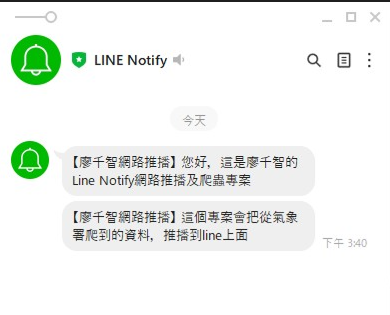

In [ ]:
url = 'https://opendata.cwa.gov.tw/api/v1/rest/datastore/E-A0015-001?Authorization=CWA-1AA20C91-AEAB-4621-9CCC-CBD3C1132B3D'
jdata = requests.get(url).json()

df = pd.DataFrame(columns=["alert", "datetime", "location", "longitude", "longitude", "magnitude"])

for record in jdata['records']['Earthquake']:
    alert = record['ReportColor']
    datetime = record['EarthquakeInfo']['OriginTime']
    location = record['EarthquakeInfo']['Epicenter']['Location']
    latitude = record['EarthquakeInfo']['Epicenter']['EpicenterLatitude']
    longitude = record['EarthquakeInfo']['Epicenter']['EpicenterLongitude']
    magnitude = record['EarthquakeInfo']['EarthquakeMagnitude']['MagnitudeValue']


    df.loc[len(df.index)] = [alert, datetime, location, latitude, longitude, magnitude]

display(df)

,alert,datetime,location,longitude,longitude,magnitude
0,綠色,2024-05-08 16:40:43,花蓮縣政府南方 27.3 公里 (位於花蓮縣近海),23.75,121.58,4.7
1,綠色,2024-05-08 04:19:58,花蓮縣政府南方 8.4 公里 (位於花蓮縣近海),23.92,121.61,4.4
2,綠色,2024-05-08 01:21:16,花蓮縣政府西南方 29.5 公里 (位於花蓮縣鳳林鎮),23.77,121.47,4.2
3,綠色,2024-05-07 20:48:42,花蓮縣政府南南西方 24.1 公里 (位於花蓮縣壽豐鄉),23.78,121.56,4.7
4,黃色,2024-05-06 17:52:46,花蓮縣政府南方 27.8 公里 (位於花蓮縣近海),23.74,121.58,5.9
5,黃色,2024-05-06 17:45:31,花蓮縣政府南方 26.0 公里 (位於花蓮縣近海),23.76,121.59,5.9
6,綠色,2024-05-04 10:31:58,花蓮縣政府北方 27.7 公里 (位於花蓮縣秀林鄉),24.24,121.65,4.0
7,綠色,2024-05-04 07:40:40,花蓮縣政府南方 25.7 公里 (位於花蓮縣近海),23.76,121.59,4.0
8,綠色,2024-05-04 03:21:15,花蓮縣政府南方 28.5 公里 (位於花蓮縣近海),23.73,121.60,4.4
9,綠色,2024-05-03 17:35:13,花蓮縣政府南方 10.7 公里 (位於花蓮縣近海),23.89,121.61,4.0


推播最新資訊

In [ ]:
row = df.iloc[0]
headers = {
    "Authorization": "Bearer " + token           # POST 使用的 headers
}
data = {
    "message": "\n警報等級: {}\n時間: {}\n地點: {}\n座標: ({},{})\n芮氏規模: {}".format(row[0], row[1], row[2], row[3], row[4], row[5])   # 發送的訊息
}
data = requests.post(notify_url, headers=headers, data=data)    # 發送 LINE NOtify

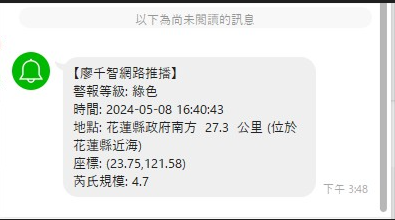

也可以一次推播多則

In [ ]:
for i in range(1,3):
    row = df.iloc[i]  # 獲取目標數據
    message = "\n警報等級: {}\n時間: {}\n地點: {}\n座標: ({},{})\n芮氏規模: {}".format(row[0], row[1], row[2], row[3], row[4], row[5])
    data = {"message": message}
    response = requests.post(notify_url, headers=headers, data=data)  # 推播
    # print("第{}則消息已發送".format(i+1))

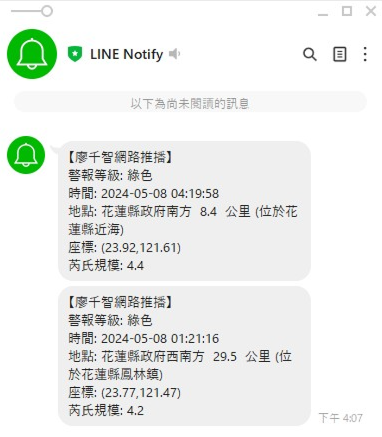

#總成果展示

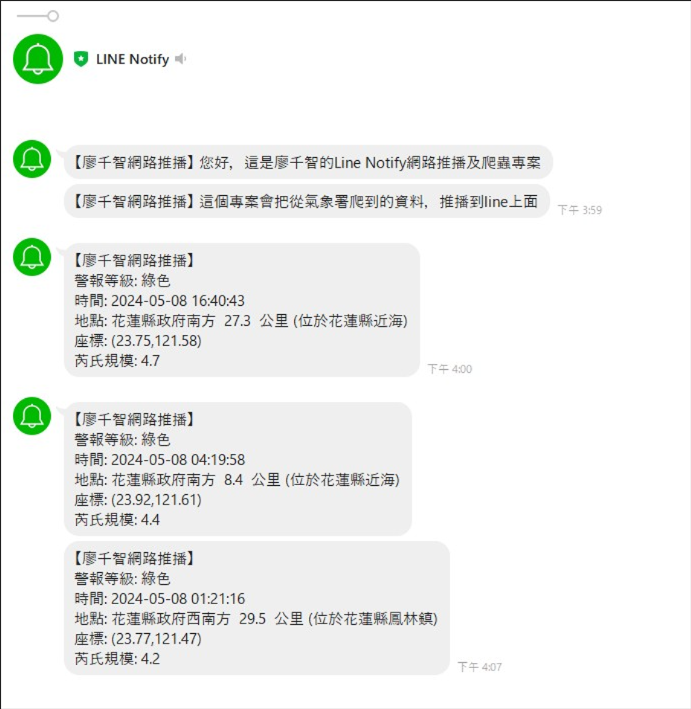